In [10]:
import sys
sys.path.append('..\\..\\src')
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import pymc as pm
# import theano
# from theano import tensor as T

import pytensor.tensor as T
#import aesara
#from aesara import tensor as T
import change_point_tools as cp_Tools
from pymc.math import switch
import matplotlib.pyplot as plt
import arviz as az
import xarray as xr

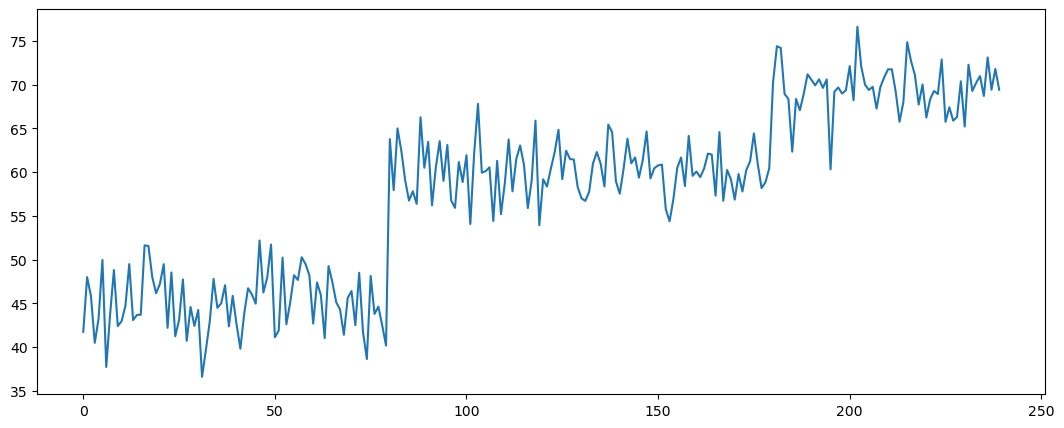

In [128]:
plt.figure(figsize=(13,5))
np.random.seed(123) #initialize random seed
size1 = 80 #size of first part (number of points)
size2 = 100 #size of second part (number of points)
size3 = 60 #size of third part (number of points)
N = size1+size2+size3 #total number of points
scale = 3 #standard deviation of distribution function across all three parts
loc1 = 45 #mean of normal for first part
loc2 = 60 #mean of normal for second part
loc3 = 70 #mean of normal for third part
d1 = norm.rvs(loc=loc1,size=size1,scale=scale) #randomly generates points for first part
d2 = norm.rvs(loc=loc2,size=size2,scale=scale) #randomly generates points for second part
d3 = norm.rvs(loc=loc3,size=size3,scale=scale) #randomly generates points for third part
data = np.hstack([d1,d2,d3]) #these are our final observation points
#data
plt.plot(data) #let's have a look at our data
plt.show()

In [129]:
prob_full_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='full_cov', prior='const',  engine='numba', normal=True)
prob_full_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='full_cov', prior='geometric',  engine='numba', normal=True)
prob_gauss_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='gauss', prior='const',  engine='numba', normal=True)
prob_gauss_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='gauss', prior='geometric',  engine='numba', normal=True)
prob_ifm_const = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='ifm', prior='const',  engine='numba', normal=True)
prob_ifm_geo = cp_Tools.bayes_offline_sdt(cp_Tools.normalize_array(data,0,0), segment_length=900, p=.000001, method='ifm', prior='geometric',  engine='numba', normal=True)

pelt = cp_Tools.pelt_bkps(data, pen=20, min_size=10)

In [130]:
prob_list = [prob_full_const, prob_full_geo, prob_gauss_const, prob_gauss_geo, prob_ifm_const, prob_ifm_geo]
prob_title = {0 : 'uniform | full covariance', 
                1 : 'geometric | full covariance', 
                2 : 'uniform | gaussian', 
                3 : 'geometric | gaussian', 
                4 : 'uniform | ifm', 
                5 : 'geometric | ifm'} 

pelt

[15, 25, 45, 60, 80, 180, 240]

Text(0.5, 0.98, 'Offline Bayesian Search methods "blue", Compared to PELT method "red":  where label = (prior | method)')

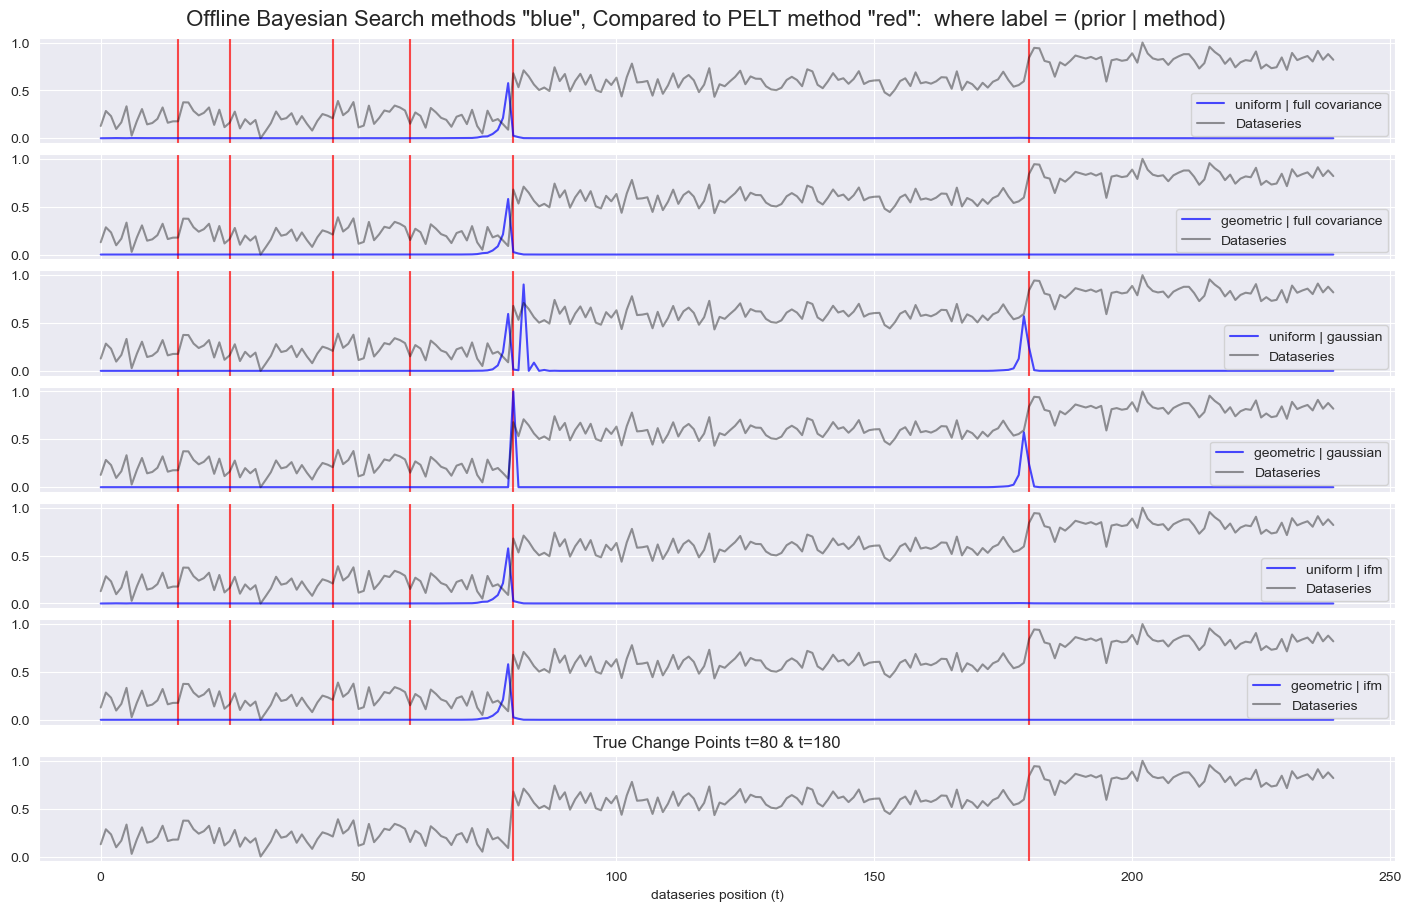

In [173]:
import seaborn as sns

sns.set_style('darkgrid')
x = np.arange(len(data))
fig, ax = plt.subplots(7,1, figsize=(14,9), layout='constrained', sharex=True)
#fig.tight_layout()

#plt.figure(figsize=(12,4))
for i in pelt[::-1][1:]:
    for j in range(len(prob_list)):
        
        ax[j].axvline(i, color='red', alpha=0.7)
for p in range(len(prob_list)):
   # for q in prob_title:
    sns.lineplot((prob_list[p]), label=prob_title[p], ax=ax[p], color='b', alpha=0.7)
    sns.lineplot(cp_Tools.normalize_array(data,0,0), ax=ax[p], color='k', alpha=0.4, label='Dataseries')
    ax[p].legend(loc='lower right')



ax[6].plot(cp_Tools.normalize_array(data,0,0), color='k', alpha=0.4)
ax[6].axvline(80, color='red', alpha=0.7)
ax[6].axvline(180, color='red', alpha=0.7)
ax[6].set_title('True Change Points t=80 & t=180')
ax[6].set_xlabel('dataseries position (t)')
fig.suptitle('Offline Bayesian Search methods "blue", Compared to PELT method "red":  where label = (prior | method)', fontsize=16)



